In [1]:
!curl -s https://course.fast.ai/setup/colab | bash
    
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.tabular import *


from google.colab import drive

drive.mount("/content/drive")
path = Path('/content/drive/My Drive/Competitions/Timeseries')

Updating fastai...
Done.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# !unzip '/content/drive/My Drive/Competitions/Timeseries/models/aivivn_timeseries.zip' -d '/content/drive/My Drive/Competitions/Timeseries/datasets'

In [0]:
tet_holidays = {'2018':{'start':'2018-02-11', 
                        'end':'2018-02-24'},
                '2019':{'start':'2019-01-31',
                        'end':'2019-02-14'
                       }
               }

In [0]:
def prepare_data(path, is_train = True):
    df = pd.read_csv(path)
    if is_train:
        df = df[(df.MAX_USER != 0)]
        df['MAX_USER'] = df['MAX_USER']/51
#         df.BANDWIDTH_TOTAL = 1/df.BANDWIDTH_TOTAL**2
    num_active_server = df.groupby(['UPDATE_TIME','HOUR_ID']).SERVER_NAME.nunique().reset_index()
    num_active_server.columns = ['UPDATE_TIME','HOUR_ID','NUM_ACTIVE_SERVER']
    num_active_zone = df.groupby(['UPDATE_TIME','HOUR_ID']).ZONE_CODE.nunique().reset_index()
    num_active_zone.columns = ['UPDATE_TIME','HOUR_ID','NUM_ACTIVE_ZONE']    
    df = pd.merge(df, num_active_server, on = ['UPDATE_TIME','HOUR_ID'])
    df = pd.merge(df, num_active_zone, on = ['UPDATE_TIME','HOUR_ID'])
    df = add_datepart(df, 'UPDATE_TIME', drop= False)
    df['IS_TET'] = (((pd.to_datetime(df.UPDATE_TIME) > pd.to_datetime(tet_holidays['2018']['start'])) 
                   &(pd.to_datetime(df.UPDATE_TIME) < pd.to_datetime(tet_holidays['2018']['end'])))
                   |((pd.to_datetime(df.UPDATE_TIME) > pd.to_datetime(tet_holidays['2019']['start'])) 
                   &(pd.to_datetime(df.UPDATE_TIME) < pd.to_datetime(tet_holidays['2019']['end'])))
                  )
    df = df[df.IS_TET == False]
    df.reset_index(inplace=True)
    del df['index']
    return df

In [0]:
train = prepare_data(path/'datasets/train.csv')


In [0]:
test = [1,2,3,4,5]
test.reverse()

In [0]:
bandwidth_total = train[train.BANDWIDTH_TOTAL>0].BANDWIDTH_TOTAL

In [0]:
def encode_range(value):
    global threshold
    for i in range(len(threshold)):
        if value >= threshold[i]:
            return i
encode_range = np.vectorize(encode_range)
   

In [0]:
threshold = []
def target_encode(df, target_col, num_classes):
    ## Gen threshold:
    global threshold
    threshold= []
    step_size = 100/num_classes
    for i in range(num_classes):
        t = np.percentile(df[target_col],(i)*step_size)
        threshold = [t] + threshold
    df['target_encoded'] = encode_range(df[target_col])
    return df
    
    

In [0]:
train = target_encode(train, 'BANDWIDTH_TOTAL', 5)

In [0]:
test_df.head()

,id,UPDATE_TIME,HOUR_ID,ZONE_CODE,SERVER_NAME,NUM_ACTIVE_SERVER,NUM_ACTIVE_ZONE,UPDATE_TIMEYear,UPDATE_TIMEMonth,UPDATE_TIMEWeek,UPDATE_TIMEDay,UPDATE_TIMEDayofweek,UPDATE_TIMEDayofyear,UPDATE_TIMEIs_month_end,UPDATE_TIMEIs_month_start,UPDATE_TIMEIs_quarter_end,UPDATE_TIMEIs_quarter_start,UPDATE_TIMEIs_year_end,UPDATE_TIMEIs_year_start,UPDATE_TIMEElapsed,IS_TET
0,0,2019-03-10,0,ZONE01,SERVER_ZONE01_001,499,3,2019,3,10,10,6,69,False,False,False,False,False,False,1552176000,False
1,743,2019-03-10,0,ZONE01,SERVER_ZONE01_002,499,3,2019,3,10,10,6,69,False,False,False,False,False,False,1552176000,False
2,1486,2019-03-10,0,ZONE01,SERVER_ZONE01_003,499,3,2019,3,10,10,6,69,False,False,False,False,False,False,1552176000,False
3,2229,2019-03-10,0,ZONE01,SERVER_ZONE01_004,499,3,2019,3,10,10,6,69,False,False,False,False,False,False,1552176000,False
4,2972,2019-03-10,0,ZONE01,SERVER_ZONE01_005,499,3,2019,3,10,10,6,69,False,False,False,False,False,False,1552176000,False


In [0]:
cont_vars = ['NUM_ACTIVE_SERVER', 'NUM_ACTIVE_ZONE','UPDATE_TIMEElapsed']
cat_vars = ['HOUR_ID', 'ZONE_CODE','SERVER_NAME','UPDATE_TIMEYear', 'IS_TET','UPDATE_TIMEMonth','UPDATE_TIMEWeek','UPDATE_TIMEDay','UPDATE_TIMEDayofweek']
dep_var = 'target_encoded'

procs=[FillMissing, Categorify, Normalize]


In [0]:
cut_idx = min(train[train.UPDATE_TIME > '2019-01-09'].index )

valid_idx = range(cut_idx, train.shape[0])

In [0]:
test_df = prepare_data(path/'datasets/test_id.csv', is_train = False)

In [0]:
test_df.head()

,id,UPDATE_TIME,HOUR_ID,ZONE_CODE,SERVER_NAME,NUM_ACTIVE_SERVER,NUM_ACTIVE_ZONE,UPDATE_TIMEYear,UPDATE_TIMEMonth,UPDATE_TIMEWeek,UPDATE_TIMEDay,UPDATE_TIMEDayofweek,UPDATE_TIMEDayofyear,UPDATE_TIMEIs_month_end,UPDATE_TIMEIs_month_start,UPDATE_TIMEIs_quarter_end,UPDATE_TIMEIs_quarter_start,UPDATE_TIMEIs_year_end,UPDATE_TIMEIs_year_start,UPDATE_TIMEElapsed,IS_TET
0,0,2019-03-10,0,ZONE01,SERVER_ZONE01_001,499,3,2019,3,10,10,6,69,False,False,False,False,False,False,1552176000,False
1,743,2019-03-10,0,ZONE01,SERVER_ZONE01_002,499,3,2019,3,10,10,6,69,False,False,False,False,False,False,1552176000,False
2,1486,2019-03-10,0,ZONE01,SERVER_ZONE01_003,499,3,2019,3,10,10,6,69,False,False,False,False,False,False,1552176000,False
3,2229,2019-03-10,0,ZONE01,SERVER_ZONE01_004,499,3,2019,3,10,10,6,69,False,False,False,False,False,False,1552176000,False
4,2972,2019-03-10,0,ZONE01,SERVER_ZONE01_005,499,3,2019,3,10,10,6,69,False,False,False,False,False,False,1552176000,False


In [0]:
train['NUM_ACTIVE_SERVER']

0          313
1          313
2          313
3          313
4          313
5          313
6          313
7          313
8          313
9          313
10         313
11         313
12         313
13         313
14         313
15         313
16         313
17         313
18         313
19         313
20         313
21         313
22         313
23         313
24         313
25         313
26         313
27         313
28         313
29         313
          ... 
5915052    499
5915053    499
5915054    499
5915055    499
5915056    499
5915057    499
5915058    499
5915059    499
5915060    499
5915061    499
5915062    499
5915063    499
5915064    499
5915065    499
5915066    499
5915067    499
5915068    499
5915069    499
5915070    499
5915071    499
5915072    499
5915073    499
5915074    499
5915075    499
5915076    499
5915077    499
5915078    499
5915079    499
5915080    499
5915081    499
Name: NUM_ACTIVE_SERVER, Length: 5915082, dtype: int64

In [0]:
def inverse_exp_mape(pred:Tensor, targ:Tensor)->Rank0Tensor:
    "Exp MAPE between `pred` and `targ`."
    pred,targ = flatten_check(pred,targ)
    pred, targ = torch.exp(pred), torch.exp(targ)
    pct_var = torch.abs(torch.sqrt(1/targ) - torch.sqrt(1/pred))*torch.sqrt(targ)
    return pct_var.mean()*100

In [0]:
def exp_mape(pred:Tensor, targ:Tensor)->Rank0Tensor:
    "Exp MAPE between `pred` and `targ`."
    pred,targ = flatten_check(pred,targ)
    pred, targ = torch.exp(pred), torch.exp(targ)
    pct_var = torch.abs(targ - pred)/targ
    return pct_var.mean()*100

In [0]:
def mape(pred:Tensor, targ:Tensor)->Rank0Tensor:
    "Exp MAPE between `pred` and `targ`."
    pred,targ = flatten_check(pred,targ)
    pct_var = torch.abs(targ - pred)/targ
    return pct_var.mean()*100

In [0]:
data = (TabularList.from_df(train, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs,)
                .split_by_idx(valid_idx)
                .label_from_df(cols=dep_var)
                .add_test(TabularList.from_df(test_df, path=path, cat_names=cat_vars, cont_names=cont_vars))
                .databunch())

In [0]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                        y_range=y_range, metrics=accuracy)

In [0]:
def weighted_mse(inp, target):
    return torch.mean((inp-target)**2/torch.exp(target)**2)

In [0]:
learn.loss_func


FlattenedLoss of CrossEntropyLoss()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


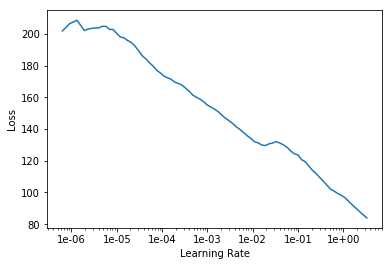

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.967592,1.072006,0.572519,23:32


In [0]:
dep_var2 = 'MAX_USER'
data2 = (TabularList.from_df(train, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs,)
                .split_by_idx(valid_idx)
                .label_from_df(cols=dep_var2, label_cls=FloatList, log=True)
                .add_test(TabularList.from_df(test_df, path=path, cat_names=cat_vars, cont_names=cont_vars))
                .databunch())

max_log_y2 = np.log(np.max(train['MAX_USER'])*1.2)
y_range2 = torch.tensor([0, max_log_y2], device=defaults.device)

learn2 = tabular_learner(data2, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                        y_range=y_range2, metrics=exp_mape)




In [0]:
learn2.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [0]:
learn2.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,exp_mape,time
0,0.069218,0.136755,25.241941,27:37


In [0]:
max_user_preds=learn2.get_preds(DatasetType.Test)

In [0]:
bandwidth_total_preds = learn.get_preds(DatasetType.Test)

In [0]:
interpret = learn.interpret()

In [0]:
bandwidth_total_preds[1]

tensor([0, 0, 0,  ..., 0, 0, 0])

In [0]:
temp = [max(i) for i in bandwidth_total_preds[0].numpy()]

In [0]:
interpret.confusion_matrix()

array([[169105,  20820,   3308,   2859,    828],
       [ 37972,  43838,  17675,  17459,   5630],
       [  7520,  17922,  22667,  30967,  15642],
       [  2298,   2875,  10098,  28212,  30890],
       [   786,    203,   1157,   9594,  52923]])

In [0]:
test_df['prob'] =  temp

In [0]:
test_df['adj_bandwidth_total'] = test_df['BANDWIDTH_TOTAL']

In [0]:
def adj_bandwidth(value, prob):
    if prob < 0.5:
        return 0
    return value

adj_bandwidth = np.vectorize(adj_bandwidth)

In [0]:
test_df['adj_bandwidth_total']= adj_bandwidth(test_df['BANDWIDTH_TOTAL'], test_df['prob'])

In [0]:
test_df.BANDWIDTH_TOTAL = test_df.BANDWIDTH_TOTAL.map(lambda i: threshold[int(i)])

In [0]:
test_df['MAX_USER'] = (np.exp(max_user_preds[0].data).numpy()*51).T[0].astype(int)


In [0]:
test_df['BANDWIDTH_TOTAL'] = np.round(test_df['BANDWIDTH_TOTAL']/10, 2) 

In [0]:
valid_df = train.iloc[valid_idx]

In [0]:
valid_df['pred_bandwidth']

In [0]:
def convert_to_label(x1, x2):
    return '{:.2f} {}'.format(x1, int(x2))

convert_to_label = np.vectorize(convert_to_label)

In [0]:
test_df.head()

,id,UPDATE_TIME,HOUR_ID,ZONE_CODE,SERVER_NAME,NUM_ACTIVE_SERVER,NUM_ACTIVE_ZONE,UPDATE_TIMEYear,UPDATE_TIMEMonth,UPDATE_TIMEWeek,UPDATE_TIMEDay,UPDATE_TIMEDayofweek,UPDATE_TIMEDayofyear,UPDATE_TIMEIs_month_end,UPDATE_TIMEIs_month_start,UPDATE_TIMEIs_quarter_end,UPDATE_TIMEIs_quarter_start,UPDATE_TIMEIs_year_end,UPDATE_TIMEIs_year_start,UPDATE_TIMEElapsed,IS_TET,MAX_USER,BANDWIDTH_TOTAL,label
0,0,2019-03-10,0,ZONE01,SERVER_ZONE01_001,499,3,2019,3,10,10,6,69,False,False,False,False,False,False,1552176000,False,1316,1.000005,0.00 1316
1,743,2019-03-10,0,ZONE01,SERVER_ZONE01_002,499,3,2019,3,10,10,6,69,False,False,False,False,False,False,1552176000,False,2215,1.000003,0.00 2215
2,1486,2019-03-10,0,ZONE01,SERVER_ZONE01_003,499,3,2019,3,10,10,6,69,False,False,False,False,False,False,1552176000,False,3106,1.000009,0.00 3106
3,2229,2019-03-10,0,ZONE01,SERVER_ZONE01_004,499,3,2019,3,10,10,6,69,False,False,False,False,False,False,1552176000,False,2253,1.000001,0.00 2253
4,2972,2019-03-10,0,ZONE01,SERVER_ZONE01_005,499,3,2019,3,10,10,6,69,False,False,False,False,False,False,1552176000,False,1804,1.000000,0.00 1804


In [0]:
test_df['label'] = convert_to_label(test_df.adj_bandwidth_total, test_df.MAX_USER)

In [0]:
test_df[['id','label']].to_csv(path/'submission.csv', index = False)

In [0]:
test_df[test_df.prob>0.5].head(100)

,id,UPDATE_TIME,HOUR_ID,ZONE_CODE,SERVER_NAME,NUM_ACTIVE_SERVER,NUM_ACTIVE_ZONE,UPDATE_TIMEYear,UPDATE_TIMEMonth,UPDATE_TIMEWeek,UPDATE_TIMEDay,UPDATE_TIMEDayofweek,UPDATE_TIMEDayofyear,UPDATE_TIMEIs_month_end,UPDATE_TIMEIs_month_start,UPDATE_TIMEIs_quarter_end,UPDATE_TIMEIs_quarter_start,UPDATE_TIMEIs_year_end,UPDATE_TIMEIs_year_start,UPDATE_TIMEElapsed,IS_TET,BANDWIDTH_TOTAL,MAX_USER,label,prob,adj_bandwidth_total
3,2229,2019-03-10,0,ZONE01,SERVER_ZONE01_004,499,3,2019,3,10,10,6,69,False,False,False,False,False,False,1552176000,False,146.100166,1148,146.00 1148,0.580483,146
4,2972,2019-03-10,0,ZONE01,SERVER_ZONE01_005,499,3,2019,3,10,10,6,69,False,False,False,False,False,False,1552176000,False,146.100166,929,146.00 929,0.661359,146
5,3715,2019-03-10,0,ZONE01,SERVER_ZONE01_006,499,3,2019,3,10,10,6,69,False,False,False,False,False,False,1552176000,False,146.100166,381,146.00 381,0.855121,146
6,5944,2019-03-10,0,ZONE01,SERVER_ZONE01_009,499,3,2019,3,10,10,6,69,False,False,False,False,False,False,1552176000,False,146.100166,1499,146.00 1499,0.650109,146
7,6687,2019-03-10,0,ZONE01,SERVER_ZONE01_010,499,3,2019,3,10,10,6,69,False,False,False,False,False,False,1552176000,False,146.100166,1669,146.00 1669,0.695723,146
9,9659,2019-03-10,0,ZONE01,SERVER_ZONE01_017,499,3,2019,3,10,10,6,69,False,False,False,False,False,False,1552176000,False,146.100166,1828,146.00 1828,0.538528,146
10,10402,2019-03-10,0,ZONE01,SERVER_ZONE01_018,499,3,2019,3,10,10,6,69,False,False,False,False,False,False,1552176000,False,146.100166,6547,146.00 6547,0.504415,146
13,14114,2019-03-10,0,ZONE01,SERVER_ZONE01_023,499,3,2019,3,10,10,6,69,False,False,False,False,False,False,1552176000,False,146.100166,1673,146.00 1673,0.502998,146
15,15598,2019-03-10,0,ZONE01,SERVER_ZONE01_025,499,3,2019,3,10,10,6,69,False,False,False,False,False,False,1552176000,False,146.100166,1910,146.00 1910,0.571960,146
29,26000,2019-03-10,0,ZONE01,SERVER_ZONE01_039,499,3,2019,3,10,10,6,69,False,False,False,False,False,False,1552176000,False,146.100166,1833,146.00 1833,0.597187,146


In [0]:
test_df.shape

(390579, 24)

In [0]:
test = pd.read_csv(path/'datasets/test_id.csv')

In [0]:
test.shape

(371619, 5)

In [0]:
bandwidth_baseline = train.groupby(['SERVER_NAME']).BANDWIDTH_TOTAL.min().reset_index()
max_user_baseline = train.groupby(['SERVER_NAME']).MAX_USER.min().reset_index()



In [0]:
test_baseline = pd.merge(test[['id','SERVER_NAME','ZONE_CODE','HOUR_ID','UPDATE_TIME']], bandwidth_baseline, on = ['SERVER_NAME'], how = 'left')

In [0]:
test_baseline = pd.merge(test_baseline, max_user_baseline, on = ['SERVER_NAME'], how = 'left')

In [0]:
test_baseline.fillna(0, inplace = True)

In [0]:
test_baseline['label'] = convert_to_label(test_baseline.BANDWIDTH_TOTAL, test_baseline.MAX_USER)

In [0]:
train[train.SERVER_NAME=='SERVER_ZONE03_057']

,UPDATE_TIME,HOUR_ID,ZONE_CODE,SERVER_NAME,BANDWIDTH_TOTAL,MAX_USER,NUM_ACTIVE_SERVER,NUM_ACTIVE_ZONE,UPDATE_TIMEYear,UPDATE_TIMEMonth,...,UPDATE_TIMEDayofweek,UPDATE_TIMEDayofyear,UPDATE_TIMEIs_month_end,UPDATE_TIMEIs_month_start,UPDATE_TIMEIs_quarter_end,UPDATE_TIMEIs_quarter_start,UPDATE_TIMEIs_year_end,UPDATE_TIMEIs_year_start,UPDATE_TIMEElapsed,IS_TET
5751217,2019-02-23,21,ZONE03,SERVER_ZONE03_057,218.279387,33.0,471,3,2019,2,...,5,54,False,False,False,False,False,False,1550880000,False


In [0]:
test_baseline[['id','label']].to_csv(path/'submission.csv', index = False)

In [0]:
temp = pd.merge(test_df, test_baseline, on = 'id')

In [0]:
temp['diff'] = np.abs(temp.BANDWIDTH_TOTAL_x - temp.BANDWIDTH_TOTAL_y)/temp.BANDWIDTH_TOTAL_y*100

In [0]:
temp[temp.BANDWIDTH_TOTAL_y != 0]['diff'].mean()

204.492663929818

In [0]:
train_df = train.iloc[:cut_idx]

In [0]:
valid_df = train.iloc[cut_idx:]

In [0]:
bandwidth_baseline = train_df.groupby(['SERVER_NAME','HOUR_ID']).BANDWIDTH_TOTAL.min().reset_index()
max_user_baseline = train_df.groupby(['SERVER_NAME','HOUR_ID']).MAX_USER.min().reset_index()

valid_baseline = pd.merge(valid_df[['SERVER_NAME','ZONE_CODE','HOUR_ID','UPDATE_TIME','BANDWIDTH_TOTAL','MAX_USER']], bandwidth_baseline, on = ['SERVER_NAME','HOUR_ID'], how = 'left')
valid_baseline = pd.merge(valid_baseline, max_user_baseline, on = ['SERVER_NAME','HOUR_ID'], how = 'left')




In [0]:
valid_baseline.head()

,SERVER_NAME,ZONE_CODE,HOUR_ID,UPDATE_TIME,BANDWIDTH_TOTAL_x,MAX_USER_x,BANDWIDTH_TOTAL_y,MAX_USER_y
0,SERVER_ZONE01_001,ZONE01,0,2019-01-10,49.899507,36.0,0.212989,6.0
1,SERVER_ZONE01_002,ZONE01,0,2019-01-10,125.708389,25.0,1.967857,9.0
2,SERVER_ZONE01_003,ZONE01,0,2019-01-10,323.034620,32.0,5.165978,9.0
3,SERVER_ZONE01_004,ZONE01,0,2019-01-10,161.477881,44.0,9.943715,9.0
4,SERVER_ZONE01_005,ZONE01,0,2019-01-10,348.798064,58.0,38.440665,12.0


In [0]:
small_mape = valid_baseline[valid_baseline.BANDWIDTH_TOTAL_y > 350]

np.mean(np.abs(small_mape['BANDWIDTH_TOTAL_y'] -small_mape['BANDWIDTH_TOTAL_x'])/small_mape['BANDWIDTH_TOTAL_x'])

0.8276853667538071

In [0]:
iplot(train[train.SERVER_NAME == 'SERVER_ZONE01_106'].groupby("UPDATE_TIME").BANDWIDTH_TOTAL.sum().iplot(asFigure = True))

NameError: ignored

In [0]:
set(train.SERVER_NAME).difference(test_df.SERVER_NAME)

{'SERVER_ZONE01_014',
 'SERVER_ZONE01_015',
 'SERVER_ZONE01_016',
 'SERVER_ZONE01_046',
 'SERVER_ZONE01_047',
 'SERVER_ZONE01_048',
 'SERVER_ZONE01_069',
 'SERVER_ZONE01_070',
 'SERVER_ZONE01_071',
 'SERVER_ZONE01_093',
 'SERVER_ZONE01_094',
 'SERVER_ZONE01_095',
 'SERVER_ZONE01_105',
 'SERVER_ZONE01_106',
 'SERVER_ZONE01_107',
 'SERVER_ZONE01_108',
 'SERVER_ZONE01_109',
 'SERVER_ZONE01_110',
 'SERVER_ZONE01_111',
 'SERVER_ZONE01_168',
 'SERVER_ZONE01_335',
 'SERVER_ZONE01_336',
 'SERVER_ZONE02_011',
 'SERVER_ZONE02_012',
 'SERVER_ZONE02_013',
 'SERVER_ZONE02_083',
 'SERVER_ZONE02_085',
 'SERVER_ZONE02_101',
 'SERVER_ZONE02_102',
 'SERVER_ZONE02_103',
 'SERVER_ZONE02_107',
 'SERVER_ZONE02_108',
 'SERVER_ZONE02_109',
 'SERVER_ZONE02_110',
 'SERVER_ZONE02_111',
 'SERVER_ZONE02_112',
 'SERVER_ZONE02_116',
 'SERVER_ZONE02_117',
 'SERVER_ZONE02_118',
 'SERVER_ZONE02_137',
 'SERVER_ZONE02_138',
 'SERVER_ZONE02_139'}

In [0]:
set(test_df.SERVER_NAME).difference(train.SERVER_NAME)

set()

In [0]:
set(train.SERVER_NAME.value_counts())

{1,
 2,
 9,
 184,
 377,
 488,
 492,
 972,
 1103,
 1720,
 3461,
 3464,
 4006,
 4009,
 4010,
 5670,
 5717,
 5718,
 5721,
 5732,
 5735,
 5739,
 5741,
 5742,
 6236,
 6238,
 6354,
 6355,
 6356,
 6452,
 6546,
 6584,
 7855,
 7856,
 7858,
 8256,
 9186,
 10302,
 10303,
 10304,
 10305,
 10306,
 10307,
 10308,
 10309,
 10310,
 10311,
 10312,
 10313,
 10314,
 10325,
 10330,
 10371,
 10453,
 11057,
 11059,
 11060,
 11327,
 11330,
 11357,
 11360,
 11379,
 11380,
 11381,
 11432,
 11433,
 11435,
 11436,
 11437,
 11438,
 11439,
 11440,
 11441,
 11442,
 12138,
 12139,
 12142,
 12191,
 12192,
 12193,
 12194,
 12196,
 12197,
 12199,
 12212,
 12220,
 12226,
 12227,
 12229,
 12233,
 12235,
 12236,
 12243,
 12244,
 12254,
 12257,
 12258,
 12259,
 12260,
 12261,
 12262,
 12263,
 12264,
 12265,
 12266,
 12267,
 12268,
 12269,
 12270,
 12271,
 12272,
 12273,
 12274,
 12275,
 12276,
 12277,
 12278,
 12279}

In [0]:
(valid_baseline.BANDWIDTH_TOTAL_y < 20).sum()

180038

In [0]:
(180038*1 + 370749*0.8905040575809736)/(370749+180038)

0.9262954442354093

In [0]:
small_mape = valid_baseline[valid_baseline.BANDWIDTH_TOTAL_y > 20]

np.mean(np.abs(small_mape['BANDWIDTH_TOTAL_y'] -small_mape['BANDWIDTH_TOTAL_x'] )/small_mape['BANDWIDTH_TOTAL_x'])

In [0]:
bandwidth_baseline = train_df.groupby(['SERVER_NAME','HOUR_ID']).BANDWIDTH_TOTAL.median().reset_index()
max_user_baseline = train_df.groupby(['SERVER_NAME','HOUR_ID']).MAX_USER.median().reset_index()

valid_baseline = pd.merge(valid_df[['SERVER_NAME','ZONE_CODE','HOUR_ID','UPDATE_TIME','BANDWIDTH_TOTAL','MAX_USER']], bandwidth_baseline, on = ['SERVER_NAME','HOUR_ID'], how = 'left')

In [0]:

valid_baseline.head()

,SERVER_NAME,ZONE_CODE,HOUR_ID,UPDATE_TIME,BANDWIDTH_TOTAL_x,MAX_USER,BANDWIDTH_TOTAL_y
0,SERVER_ZONE01_001,ZONE01,0,2019-01-10,49.899507,36.0,23.097169
1,SERVER_ZONE01_002,ZONE01,0,2019-01-10,125.708389,25.0,52.762554
2,SERVER_ZONE01_003,ZONE01,0,2019-01-10,323.034620,32.0,78.538994
3,SERVER_ZONE01_004,ZONE01,0,2019-01-10,161.477881,44.0,129.556035
4,SERVER_ZONE01_005,ZONE01,0,2019-01-10,348.798064,58.0,195.228154
